# QFT: Gate Ansatz vs MPO Ansatz (without limitations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TensorNetwork import TensorNetwork as TN
from QFTMPO import QFTMPO
from prepare_network import *

### States preperation:

In [2]:
N = (4, 6, 8, 10, 12, 14, 16)
states = [prepare_entangled_state(N=n)[0] for n in N]

## Gate Ansatz:

In [3]:
gate_times = []
gate_result_states = []
for mps0 in states:
    mps, t = qft_with_gates(mps0, max_bond=None)
    gate_times.append(t)
    gate_result_states.append(mps)
    print(t)
    
print(gate_times)

1.9200000000000002
3.319
9.77
37.678000000000004
549.362
5493.263
28397.715
[1.9200000000000002, 3.319, 9.77, 37.678000000000004, 549.362, 5493.263, 28397.715]


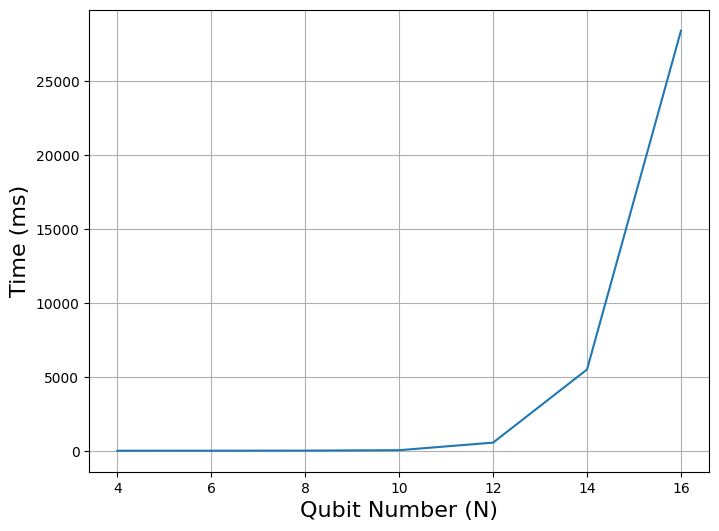

In [4]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate Ansatz Runtimes", fontsize=16)
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Time (ms)", fontsize=16)

plt.plot(N, gate_times)
plt.show()

[4, 8, 16, 32, 64, 128, 256]


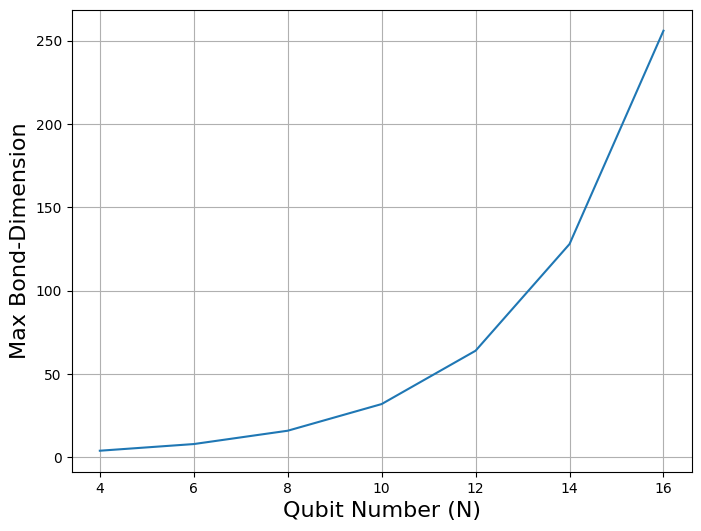

In [5]:
max_dims_g = [max(mps.get_bond_dims()) for mps in gate_result_states]
print(max_dims_g)

plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate-Ansatz Maximum Bond-Dimensions")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Max Bond-Dimension", fontsize=16)

plt.plot(N, max_dims_g)
plt.show()

## QFT-MPO Ansatz:

In [6]:
mpo_times = []
mpo_result_states = []
for mps0 in states:
    mps, t = qft_with_mpo(mps0, constr_bond=8, zip_up_bond=None)
    mpo_times.append(t)
    mpo_result_states.append(mps)
    print(t)
    
print(mpo_times)

2.173
2.892
6.802
31.694
180.186
1020.4599999999999
6109.603
[2.173, 2.892, 6.802, 31.694, 180.186, 1020.4599999999999, 6109.603]


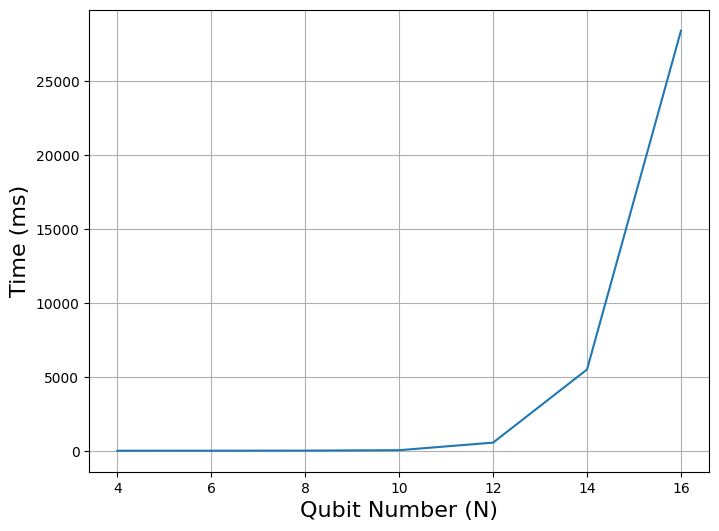

In [7]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("QFT-MPO Ansatz Runtimes")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Time (ms)", fontsize=16)

plt.plot(N, gate_times)
plt.show()

[8, 16, 32, 64, 128, 256, 512]


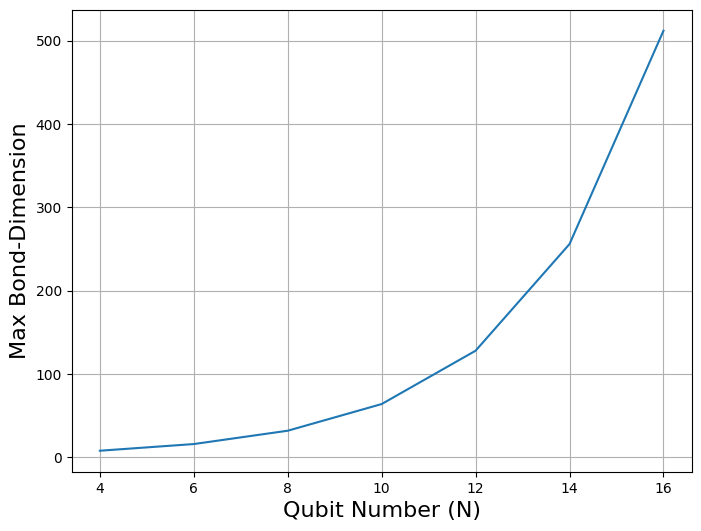

In [8]:
max_dims_m = [max(mps.get_bond_dims()) for mps in mpo_result_states]
print(max_dims_m)

plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("QFT-MPO Ansatz Maximum Bond-Dimensions")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Max Bond-Dimension", fontsize=16)

plt.plot(N[:len(max_dims_m)], max_dims_m)
plt.show()

### Comparison:

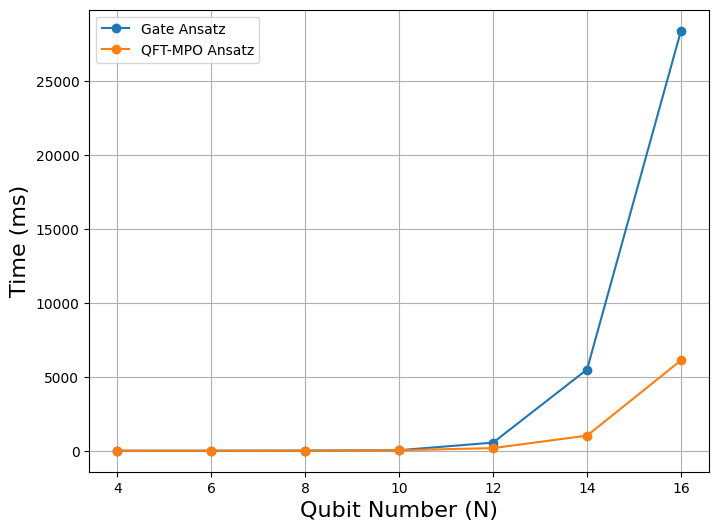

In [9]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("QFT-MPO vs Gate Ansatz (without limitation)")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Time (ms)", fontsize=16)

plt.plot(N[:len(mpo_times)], gate_times[:len(mpo_times)], "-o", label="Gate Ansatz")
plt.plot(N[:len(mpo_times)], mpo_times, "-o", label="QFT-MPO Ansatz")

plt.legend()
plt.show()

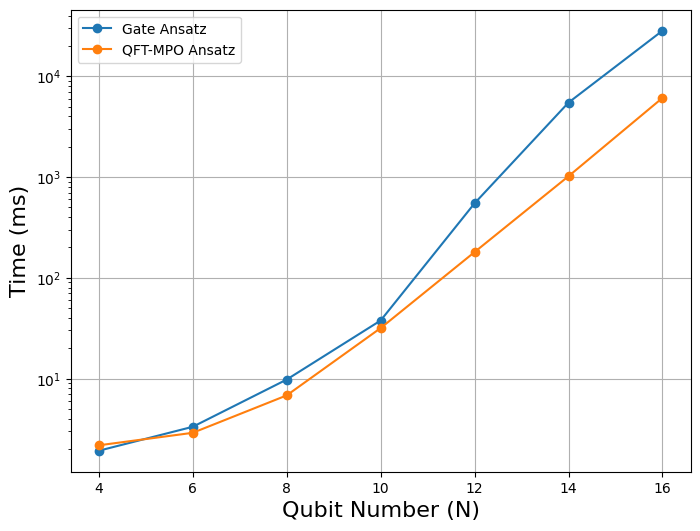

In [10]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("QFT-MPO vs Gate Ansatz (without limitation)")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Time (ms)", fontsize=16)

plt.plot(N[:len(mpo_times)], gate_times[:len(mpo_times)], "-o", label="Gate Ansatz")
plt.plot(N[:len(mpo_times)], mpo_times, "-o", label="QFT-MPO Ansatz")

plt.yscale("log")

plt.legend()
plt.show()

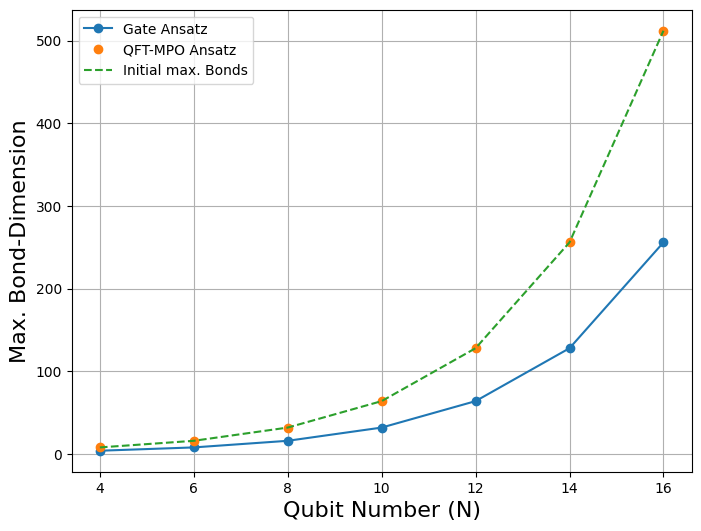

In [11]:
init_dims = [max(mps.get_bond_dims()) for mps in states]

plt.figure(figsize=(8, 6))
plt.grid()

plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Max. Bond-Dimension", fontsize=16)

plt.plot(N[:len(max_dims_m)], max_dims_g[:len(max_dims_m)], "-o", label="Gate Ansatz")
plt.plot(N[:len(max_dims_m)], max_dims_m, "o", label="QFT-MPO Ansatz")
plt.plot(N[:len(max_dims_m)], init_dims[:len(max_dims_m)], "--",label="Initial max. Bonds")

#plt.yscale("log")
plt.legend()
plt.show()